<a href="https://colab.research.google.com/github/ari0123-create/prisonbreakapp/blob/master/PB_model_ipynb_%E3%81%AE%E3%82%B3%E3%83%94%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!ls './drive/My Drive/get_image'

 acc_result.png
 cut_image.py
 dataset
 get_image_icrawler.py
 haarcascade_frontalface_default.xml
 haarcascades
 image_resize.py
 loss_result.png
 old
'PB_model (1).ipynb'
 PB_model.ipynb
 PrisonBreak_Character_Classification.h5
 PrisonBreak_Character_Classification_normal.h5
 PrisonBreak_Character_Classification_VGG16.h5
 PrisonBreak_Character_Classification_VGGFaceVGG16.h5
 Prison_Break_season1.jpg
 Prison_Break_season2.jpg
 __pycache__
 resize
 sample_model.py
 split_image.py
 test_result.png
 Untitled.ipynb


In [ ]:
!cat /proc/uptime | awk '{print $1 /60 /60 "hours"}'

0.066025hours


In [2]:
!pip install keras==2.2.4
!pip install tensorflow==1.14.0

     |████████████████████████████████| 317kB 4.7MB/s 
     |████████████████████████████████| 51kB 7.8MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3
     |████████████████████████████████| 109.2MB 38kB/s 
     |████████████████████████████████| 3.2MB 57.7MB/s 
     |████████████████████████████████| 491kB 51.4MB/s 
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0


In [3]:
!pip install keras_vggface
!pip install keras_applications

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

''

In [ ]:
import tensorflow,keras
print(tensorflow.__version__)
print(keras.__version__)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

1.14.0
2.2.4


/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

In [ ]:
import keras_applications
print(keras_applications.__version__)

ModuleNotFoundError: ignored

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

Found 636 images belonging to 5 classes.
Found 137 images belonging to 5 classes.
Found 135 images belonging to 5 classes.




58916864/58909280 [==============================] - 2s 0us/step


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/1
1/1 [==============================] - 53s 53s/step - loss: 1.6119 - acc: 0.2188 - val_loss: 1.6042 - val_acc: 0.3750
evaluate loss: 1.5979092121124268
evaluate acc: 0.375
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
[1 1 4 1 1 1 4 1 1 2 1 4 1 1 1 1 1 4 4 1 1 1 1 2 1 4 1 1 1 1]
[[0.19031249 0.21448632 0.20575899 0.1940799  0.19536227]
 [0.18638298 0.2170951  0.20487684 0.1859567  0.20568831]
 [0.19908059 0.20406264 0.20481947 0.1862197  0.20581762]
 [0.1935913  0.2112534  0.20510362 0.1957712  0.19428055]
 [0.19848378 0.2031515  0.20138489 0.19513321 0.2018466 ]
 [0.18766296

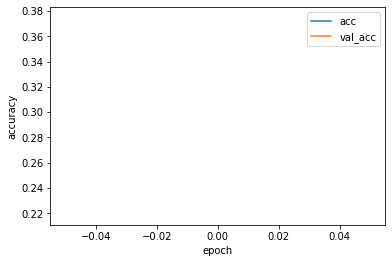

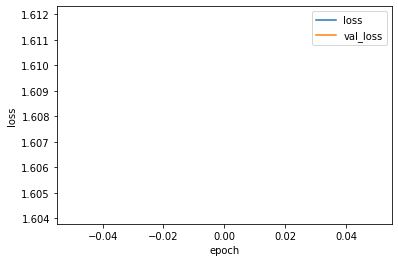

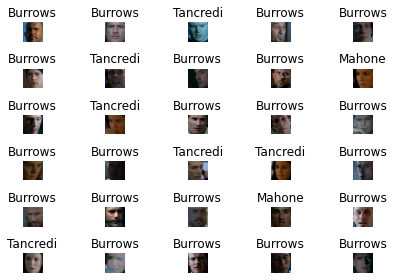

In [4]:
import os
#import glob
import numpy as np
import matplotlib.pyplot as plt
#import pandas as pd
#import cv2
from keras import optimizers
#from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Flatten, Activation, Conv2D, MaxPooling2D, Dropout
# Input, GlobalAveragePooling2D, Dropout,
from keras.engine import Model
from keras.models import Sequential
#Model,
#from keras.utils.np_utils import to_categorical 
from keras.preprocessing.image import ImageDataGenerator
#from keras import layers
# for vggface
from keras_vggface.vggface import VGGFace


def beep():
    from google.colab import output
    output.eval_js('new Audio(\
  "https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg")\
  .play()')

#水増しデータ出力ディレクトリ
#SAVE_DIR = "./drive/My Drive/get_image/padded_images"
# エポック数
epochs = 1
image_size = 200
batch_num = 32
# 入力画像の場所
CLASSES = ["Bagwell", "Burrows", "Mahone", "Scofield","Tancredi"]
#CLASSES = ["Burrows", "Mahone"]

image_list = []
label_list = []

base_dir = "./drive/My Drive/get_image/dataset/"
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')
test_dir = os.path.join(base_dir,'test')

###水増し###

# ジェネレータの作成
train_datagen = ImageDataGenerator(rescale=1./255,
                            rotation_range=20,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            channel_shift_range=0.1,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

class_mode = 'categorical'
#class_mode = 'binary'

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(image_size,image_size),
                                                    batch_size=batch_num,
                                                    classes=CLASSES,
                                                    class_mode=class_mode,
                                                    seed=1)

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                             target_size=(image_size,image_size),
                                                             batch_size=batch_num,
                                                             classes=CLASSES,
                                                             class_mode=class_mode,
                                                             seed=1)

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(image_size,image_size),
                                                  batch_size=batch_num,
                                                  classes=CLASSES,
                                                  class_mode=class_mode,
                                                  seed=1)
# バッチ作成

for i in range(batch_num):
  X_batch, y_batch = train_generator.next()

###機械学習###

# モデル作成
"""
model_name = "VGG16"

input_tensor = Input(shape=(image_size, image_size, 3))
vgg16 = VGG16(include_top=False, weights='imagenet', input_tensor=input_tensor)

top_model = Sequential()
top_model.add(Flatten(input_shape=vgg16.output_shape[1:]))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(rate=0.2))
top_model.add(Dense(128, activation='relu'))
#top_model.add(Dense(64, activation='sigmoid'))
top_model.add(Dense(5, activation='softmax'))

# モデル結合
model = Model(inputs=vgg16.input, outputs=top_model(vgg16.output))

# 15層目までの重みを固定
for layer in model.layers[:15]:
    layer.trainable = False
"""


#custom parameters
model_name = "VGGFaceVGG16"
if class_mode == 'binary':
  nb_class = 1
else:
  nb_class = len(CLASSES)
hidden_dim = 64

vgg_model = VGGFace(model='vgg16', include_top=False, input_shape=(image_size, image_size, 3))
last_layer = vgg_model.get_layer('pool5').output
x = Flatten(name='flatten')(last_layer)
x = Dense(hidden_dim, activation='relu', name='fc6')(x)
x = Dropout(0.2)(x)
x = Dense(hidden_dim, activation='relu', name='fc7')(x)
out = Dense(nb_class, activation='softmax', name='fc8')(x)
model = Model(vgg_model.input, out)


"""
#custom parameters
nb_class = 5
inputTensor = Input(shape=(image_size, image_size, 3))
vgg_model = VGGFace(model='resnet50', include_top=False, input_shape=(image_size, image_size, 3), input_tensor=inputTensor)
last_layer = vgg_model.get_layer('avg_pool').output
x = Flatten(name='flatten')(last_layer)
out = Dense(nb_class, activation='softmax', name='classifier')(x)
model = Model(vgg_model.input, out)
"""
"""
model_name = "normal"

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(2, 2), strides=(1, 1), padding="same", input_shape=(image_size, image_size, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None))
model.add(Conv2D(filters=32, kernel_size=(2, 2), strides=(1, 1), padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(5))
model.add(Activation('softmax'))
"""

# コンパイル

if class_mode == 'binary':
    loss_type = 'binary_crossentropy'
else:
    loss_type = 'categorical_crossentropy'

"""
model.compile(loss=loss_type,
              optimizer=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0),
              metrics=['acc'])

"""
"""
model.compile(loss=loss_type,
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['acc'])
"""

model.compile(loss=loss_type,
              optimizer=optimizers.Adam(lr=0.00006, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),
              metrics=['acc'])


(X_train, y_train) = train_generator.next()
(X_val, y_val) = validation_generator.next()
(X_test, y_test) = test_generator.next()
# トレーニング

history = model.fit_generator(train_generator,
                            steps_per_epoch=len(X_train) // batch_num,
                            validation_data=validation_generator,
                            validation_steps=len(X_val) // batch_num,
                            epochs=epochs)

# 精度評価
score = model.evaluate(X_test, y_test, verbose=0)
print(f"evaluate loss: {score[0]}\nevaluate acc: {score[1]}")

# サマリー表示
#model.summary()

# モデル保存
model.save(f"./drive/My Drive/get_image/PrisonBreak_Character_Classification_{model_name}.h5")

print(history.history.keys())
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

# トレーニング結果表示
fig_acc = plt.figure()
plt.plot(acc, label='acc', ls='-')
plt.plot(val_acc, label='val_acc', ls='-')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
fig_acc.savefig("./drive/My Drive/get_image/acc_result.png")

fig_loss = plt.figure()
plt.plot(loss, label='loss', ls='-')
plt.plot(val_loss, label='val_loss', ls='-')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='best')
fig_loss.savefig("./drive/My Drive/get_image/loss_result.png")

# テストデータからいくつかデータを抜き出してテスト
test_num = 30
test_data = X_test[:test_num]

# for vggfacemodel
#test_data = np.expand_dims(test_data, axis=0)
#test_data = preprocess_input(test_data, version=1) # or version=2
pre = model.predict(test_data)
pred = np.argmax(pre, axis=1)
#pred = [0,1,2,3,4,5] * 5
print(pred)
print(pre)

# テスト結果をグリッド状に出力
data_num = len(test_data)
if data_num % 5 == 0:
    plot_row = data_num // 5
else:
    plot_row = data_num // 5 + 1
plot_column = 5
fig_test = plt.figure()
#print(f"plot_row={plot_row},plot_column={plot_column}")
for i in range(data_num):
    plt.subplot(plot_row, plot_column, i + 1)
    plt.title(f"{CLASSES[pred[i]]}")
    plt.imshow(X_test[i:i + 1].reshape(image_size, image_size, 3))
    plt.axis('off')
plt.tight_layout()
#plt.show()
fig_test.savefig("./drive/My Drive/get_image/test_result.png")

beep()
